<a href="https://colab.research.google.com/github/MARTAMM77/1.1-lab_bash/blob/main/soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np

In [2]:
import pandas as pd

# Leer el archivo CSV y almacenar los datos en el DataFrame "attacks"
attacks = pd.read_csv(r'C:\\Users\\Usuario\\Desktop\\Ironhack\\w2-project_pandas\\attacks.csv', encoding='latin-1')

# Obtener la forma del DataFrame "attacks"
print(attacks.shape)

(25723, 24)


In [3]:
#attacks.head()

In [4]:
print(attacks['Year'].dtype)

float64


In [5]:
unique_values = attacks['Year'].unique() #después de imprimir no hay datos en el año 2020, 2021 y 2022


In [6]:
Years = list(range(1991, 2024))
total_rows = 0
# Calcular el número total de filas para cada año
for Year in Years:
    filtered_data = attacks[attacks['Year'] == Year]
    num_rows = len(filtered_data)
    total_rows += num_rows

# Imprimir el número total de filas
display(total_rows)

    

2609

In [7]:
start_Year = 1991
end_Year = 2023

condition = (attacks['Year'] >= start_Year) & (attacks['Year'] <= end_Year)
filtered_data = attacks.loc[condition]

# Quitar el resto de filas del DataFrame
attacks = attacks.drop(attacks.index.difference(filtered_data.index))

# Imprimir el DataFrame resultante con las filas deseadas
#display(attacks)

In [8]:
attacks.shape


(2609, 24)

In [9]:
# Filtrar las filas donde la columna "Species" contiene la palabra "shark" y asignar NaN al resto
attacks.loc[attacks['Species '].str.contains('shark', na=False), 'Species '] = 'shark'
attacks.loc[~attacks['Species '].str.contains('shark', na=False), 'Species '] = ' '

# Imprimir el DataFrame completo
#display(attacks)

In [10]:
#print(attacks.columns)

In [11]:
attacks['Case Number'] = attacks['Case Number'].astype(str)
#print(attacks['Case Number'].dtype)
#el tipo de datos 'object' que se muestra después de ejecutar attacks['Case Number'].astype(str) es equivalente a str en Pandas. 'object' se utiliza para representar una columna que contiene cadenas de caracteres (string) en un DataFrame de Pandas.

In [12]:
# Índices de las filas que se desean eliminar
#index = [495, 494, 107, 190, 276, 494, 495, 1791]

# Eliminar las filas utilizando el método .drop()
#attacks = attacks.drop(index)

In [13]:
#print(attacks.head())

In [14]:
import pandas as pd
attacks = pd.read_csv(r'C:\\Users\\Usuario\\Desktop\\Ironhack\\w2-project_pandas\\attacks.csv', encoding='latin-1')
import re


# Definimos la función
def revisar_fechas (valor):
   fechas_encontradas=[]
   expresion_regular = r'\b(19[0-9]{2}|20[0-9]{2})\.(0[1-9]|1[0-2])\.(0[0-9]|[1-2]\d|3[0-1])\b'
   fechas_encontradas = re.findall(expresion_regular, valor)
   if fechas_encontradas!=[]:
      ano=fechas_encontradas[0][0]
      mes=fechas_encontradas[0][1]
      dia=fechas_encontradas[0][2]
      if int(dia)==0:
       dia='01'
      if len(mes)==1:
        mes='0'+ mes
      if len (dia)==1:
        dia='0'+ dia
      return ano + '.' + mes + '.' + dia
   else:
      return ''
attacks['Case Number'] = attacks['Case Number'].astype(str).apply(revisar_fechas)

attacks['Case Number'] = attacks['Case Number'].apply(revisar_fechas)

#display(attacks)

In [15]:
attacks = attacks.sort_values('Case Number', ascending=False)
#display(attacks['Case Number'])

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Imprime el DataFrame attacks con los datos alineados a la izquierda
#display(attacks)

In [17]:
import math
def eliminar_decimales(numero):
    if math.isnan(numero):
        return ''
    else:
        return int(numero)

# Aplica la función a la columna 'years'
attacks['Year'] = attacks['Year'].apply(eliminar_decimales)
#display (attacks['Year'])


In [18]:
pd.set_option('display.max_rows', None)

# Imprime el DataFrame attacks completo
#display(attacks)

In [19]:
attacks["Date"] = None
#display(attacks)

In [20]:
attacks['Date'] = pd.to_datetime(attacks['Case Number'], format='%Y.%m.%d').dt.strftime('%d-%b-%Y')

# Imprime el DataFrame para verificar los cambios
#display(attacks)

In [21]:
valores_unicos = attacks['Country'].unique()

#display(valores_unicos)

In [22]:
attacks['Country'].fillna('', inplace=True)
valores_unicos = attacks['Country'].unique()

# Imprime el DataFrame para verificar los cambios
#display(valores_unicos)


In [23]:
attacks['Country'] = attacks['Country'].str.upper()

#display(attacks['Country'])

In [24]:
#display(attacks['Species '])

In [25]:
attacks.shape

(25723, 24)

In [26]:
import math

def eliminar_decimales(numero):
    if isinstance(numero, (int, float)):
        if math.isnan(numero):
            return ''
        else:
            return int(numero)
    elif isinstance(numero, str):
        return ''

# Aplica la función a la columna 'original order'
attacks['original order'] = attacks['original order'].apply(eliminar_decimales)







In [27]:
attacks['Type'] = attacks['Type'].replace('Invalid', '')
valores_unicos = attacks['Type'].unique()

#display(valores_unicos)

In [28]:
import numpy as np

# Define una lista de valores que deseas reemplazar por celdas en blanco
valores_a_reemplazar = ['Questionable', 'NaN', 'Boat', 'nan', 'Boatomg']

# Reemplaza los valores por celdas en blanco en la columna 'Type'
attacks['Type'] = attacks['Type'].apply(lambda x: '' if x in valores_a_reemplazar or pd.isna(x) else x)

#print(attacks['Type'])
#display(valores_unicos)


In [29]:
attacks.to_csv('attacksfinal.csv', index=False)

In [30]:
#dejo en blanco las celdas que no tengan numero de 2digitos o 1 digito
attacks['Age'] = attacks['Age'].apply(lambda x: '' if isinstance(x, str) and not x.isdigit() or (isinstance(x, int) or isinstance(x, float)) and not (10 <= x <= 99) else x)

#display(attacks['Age'])

In [31]:

# Reemplaza los valores NaN, nan, Nan, NAN por espacio en blanco
attacks = attacks.replace([np.nan, 'nan', 'Nan', 'NAN'], '')

# Imprime el DataFrame para verificar los cambios
#print(attacks)

In [32]:
#attacks.to_csv('attacksfinal.csv', index=False)

In [33]:
print(attacks.shape)

(25723, 24)


In [34]:
def revisar_fechas (valor):
   fechas_encontradas=[]
   expresion_regular = r'\b(19[0-9]{2}|20[0-9]{2})\.(0[1-9]|1[0-2])\.(0[0-9]|[1-2]\d|3[0-1])\b'
   fechas_encontradas = re.findall(expresion_regular, valor)
   if fechas_encontradas!=[]:
      ano=fechas_encontradas[0][0]
      mes=fechas_encontradas[0][1]
      dia=fechas_encontradas[0][2]
      if int(dia)==0:
       dia='01'
      if len(mes)==1:
        mes='0'+ mes
      if len (dia)==1:
        dia='0'+ dia
      return ano + '.' + mes + '.' + dia
   else:
      return ''
attacks['Case Number.1'] = attacks['Case Number.1'].astype(str).apply(revisar_fechas)

attacks['Case Number.1'] = attacks['Case Number.1'].apply(revisar_fechas)

#display(attacks['Case Number.1'])

In [35]:
def revisar_fechas (valor):
   fechas_encontradas=[]
   expresion_regular = r'\b(19[0-9]{2}|20[0-9]{2})\.(0[1-9]|1[0-2])\.(0[0-9]|[1-2]\d|3[0-1])\b'
   fechas_encontradas = re.findall(expresion_regular, valor)
   if fechas_encontradas!=[]:
      ano=fechas_encontradas[0][0]
      mes=fechas_encontradas[0][1]
      dia=fechas_encontradas[0][2]
      if int(dia)==0:
       dia='01'
      if len(mes)==1:
        mes='0'+ mes
      if len (dia)==1:
        dia='0'+ dia
      return ano + '.' + mes + '.' + dia
   else:
      return ''
attacks['Case Number.2'] = attacks['Case Number.2'].astype(str).apply(revisar_fechas)

attacks['Case Number.2'] = attacks['Case Number.2'].apply(revisar_fechas)

#display(attacks['Case Number.2'])

In [36]:
#Dejo en blanco las celdas que contienen números (no tienen sentido)
patron_numeros = re.compile(r'\d+')

# Aplica la expresión regular en la columna 'Area' y crea una máscara booleana
mascara_numeros = attacks['Area'].str.contains(patron_numeros)

# Crea una máscara booleana para las condiciones 'miles' y 'km'
mascara_palabras = (attacks['Area'].str.contains('miles') | attacks['Area'].str.contains('km'))

# Aplica la máscara booleana para dejar en blanco las celdas de 'Area' que cumplen las condiciones
attacks.loc[mascara_numeros & ~mascara_palabras, 'Area'] = ''

unique_values = attacks['Area'].unique()   
#display (unique_values) 


In [37]:
valores_reemplazar = ['d\x92Étang-Salé', 'Bandar Ma\x92shur sea inlet']

# Reemplaza los valores con una celda en blanco
attacks['Area'] = attacks['Area'].replace(valores_reemplazar, '')
unique_values = attacks['Area'].unique()   
#display (unique_values) 


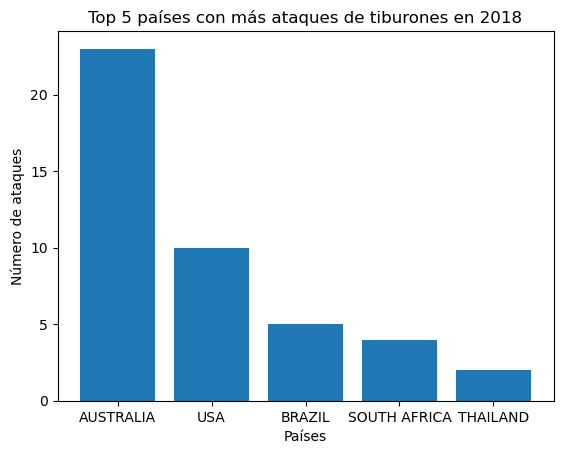

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

attacks_2018 = attacks[attacks['Year'] == 2018]  # Filtrar ataques de tiburones en el año 2018

top_countries = attacks_2018['Country'].value_counts().head(5)  # Obtener los tres primeros países con más ataques en 2018

plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Países')
plt.ylabel('Número de ataques')
plt.title('Top 5 países con más ataques de tiburones en 2018')
plt.show()


In [39]:
valores_unicos = attacks['Activity'].unique()
display (valores_unicos)

array(['Paddling', 'Standing', 'Surfing', ...,
       'Swimming to shore after boat capsized by a squall',
       'Fleeing across a river',
       'Fishing for sharks when he became entangled in net & fell overboard'],
      dtype=object)

In [40]:
#empezamos a limpiar la columna Activity
attacks['Activity'] = attacks['Activity'].str.replace(' when he became entangled in net & fell overboard', '')
#dejamos en blanco las celdas donde haya numeros
attacks['Activity'] = attacks['Activity'].apply(lambda x: '' if re.search(r'\d', str(x)) else x)
attacks['Activity'] = attacks['Activity'].str.replace('to shore after boat capsized by a squall', '')
attacks['Activity'] = attacks['Activity'].str.replace('Fishing', '')
attacks['Activity'] = attacks['Activity'].str.replace('in Alabama Deep  Rodeo', '')

#display(attacks['Activity'])

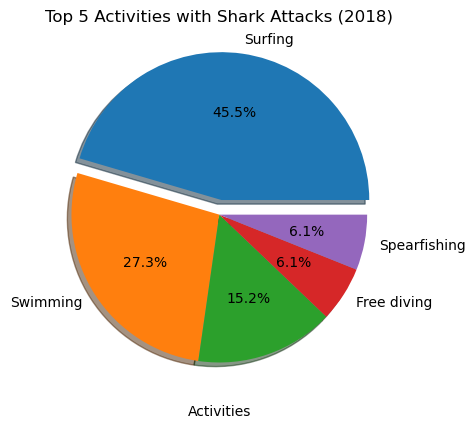

In [41]:
import matplotlib.pyplot as plt
attacks_2018 = attacks[attacks['Year'] == 2018]

# Contar el número de ocurrencias de cada actividad
top_activities = attacks_2018['Activity'].value_counts().head(5)
explodes = [0.1, 0, 0, 0, 0]

# Configurar el gráfico de tarta
plt.pie(top_activities, labels=top_activities.index, autopct='%1.1f%%', explode=explodes, shadow=True)

# Configurar título y etiqueta
plt.title('Top 5 Activities with Shark Attacks (2018)')
plt.xlabel('Activities')
plt.show()

In [42]:
attacks['Case Number.1'] = 'valor duplicado'
attacks['Case Number.2'] = 'valor duplicado'
#display(attacks['Case Number.1'])

In [43]:
attacks.to_csv('attacksfinal.csv', index=False)